<a href="https://colab.research.google.com/github/ImVikashKr/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn import mixture
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
import matplotlib.cm as cm
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Connecting colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing data from google drive
data = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
# checking the data columns and values for some rows
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# List of columns 
list(data.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [6]:
# Number of rows and columns of data
data.shape

(7787, 12)

In [7]:
# Information anout the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
#  data related statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


In [9]:
# checking if data contains null values
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# replaceing some of the null values and dropping some other ones
data['director'].fillna("Not known", inplace=True)
data['cast'].fillna("Not known", inplace=True)
data['country'].fillna("Not known", inplace=True)
data['rating'].fillna("Not known", inplace=True)
data['date_added'].fillna("Not known", inplace=True)

In [11]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
# dropping show id column as that does not provide any significant detail

data.drop(['show_id'],axis=1,inplace=True)

##**Exploratory data analysis**

In [13]:
# checking duplicates in dataframe

data.duplicated().sum()

0

In [14]:
# creating copy of data to perform EDA

netflix = data.copy()

In [15]:
# added new column named date added year
netflix['date_added_year'] =  netflix.apply(lambda row: row.date_added if row.date_added =='Not known' else row.date_added[-4:],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating')

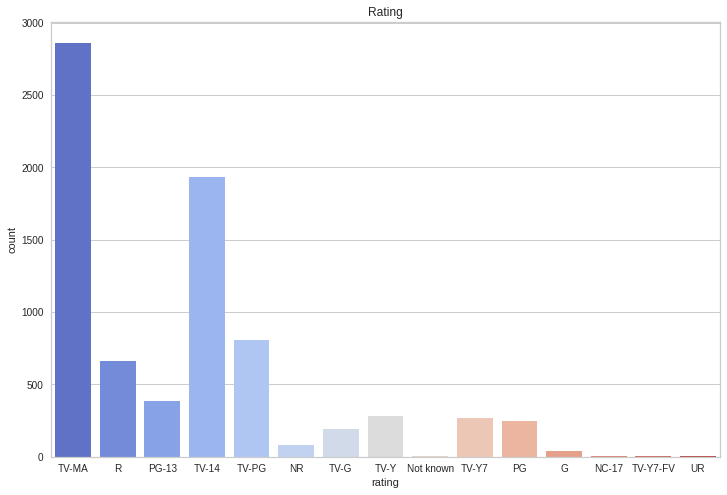

In [16]:
sns.countplot(netflix['rating'], palette='coolwarm')
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.title('Rating')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Content Type')

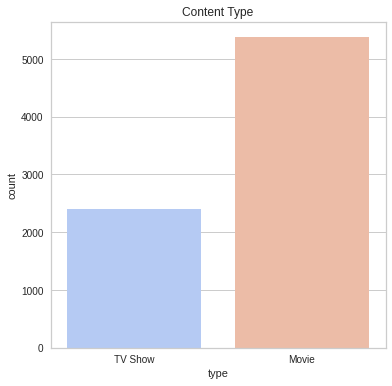

In [17]:
sns.countplot(netflix['type'], palette='coolwarm')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Content Type')

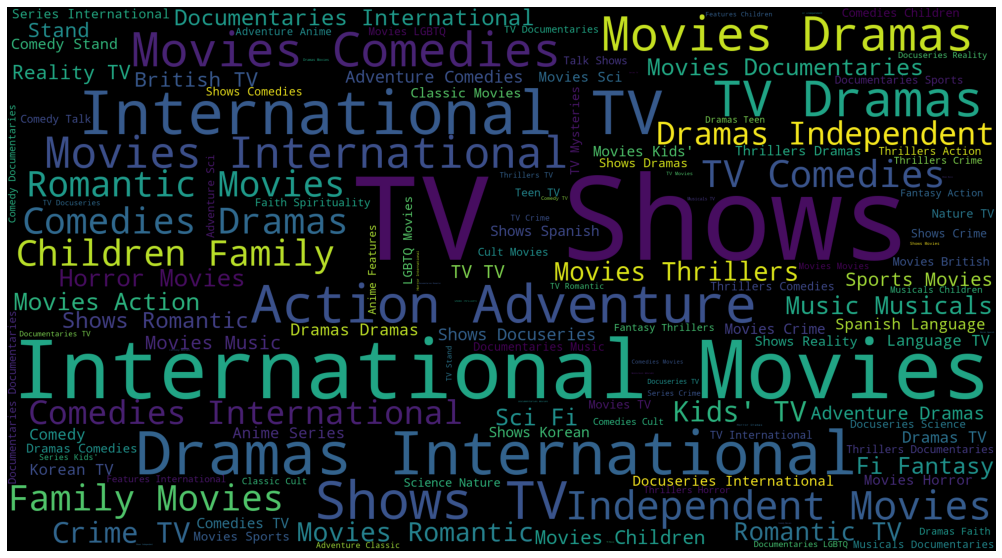

In [18]:
#Word Cloud to check the frequency of the genre of the content available in netflix

plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color='black', width=2000,height=1100).generate(" ".join(netflix[netflix['listed_in']!='Not known'].listed_in))                    
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

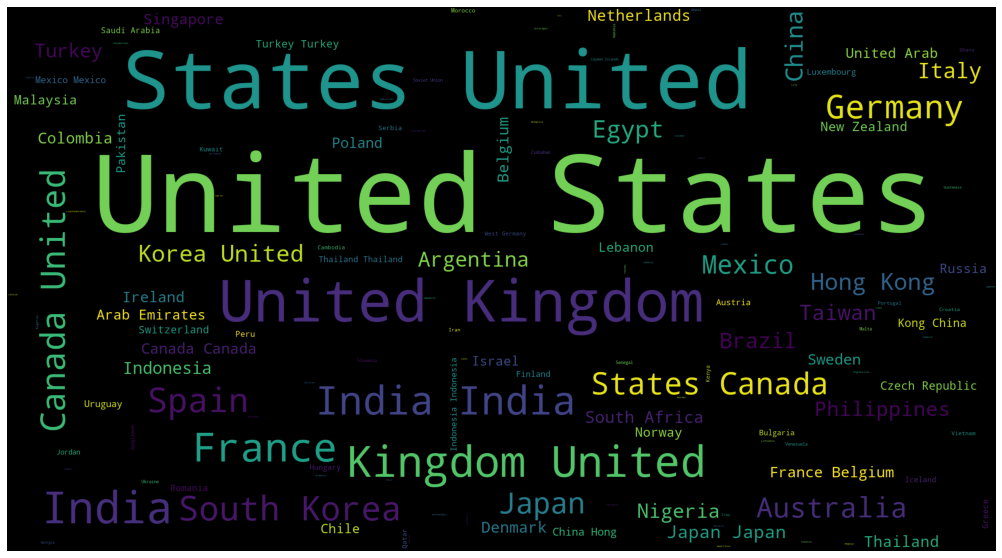

In [19]:
#Word cloud to check the most common countries

plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color='black', width=2000,height=1100).generate(" ".join(netflix[netflix['country']!='Not known'].country))                    
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
# checking different genre mentioned in 'listed in' column of dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
netflix['listed_in'].value_counts().index.values
all_genres = ""
for i in netflix['listed_in'].value_counts().index.values:
  all_genres  = all_genres + "," + i
all_genres = all_genres.split(',')
genres = [s.strip() for s in all_genres]
genres = np.unique(genres)
genres = list(genres)
print("Combined unique Genres' List : \n ")
genres.pop(0)
genres


Combined unique Genres' List : 
 


['Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

Creating separate columns for some of the genres just for EDA

In [21]:
# creating separate columns for different genres
netflix_data = netflix.copy()
netflix_data['Action & Adventure'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Action & Adventure' in x  else 0)
netflix_data['Anime'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Anime' in x  else 0)
netflix_data['Children & Family'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Children & Family' in x  else 0)
netflix_data['Classic'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Classic' in x  else 0)
netflix_data['Comedy'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Comedy' in x or 'Comedies' in x else 0)
netflix_data['Crime'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Crime' in x  else 0)
netflix_data['Documentaries'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Documentaries' in x  else 0)
netflix_data['Horror'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Horror' in x  else 0)
netflix_data['Romantic'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Romantic' in x  else 0)
netflix_data['Science'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Sci-Fi' in x or 'Science' in x else 0)
netflix_data['Thriller'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Thriller' in x  else 0)
netflix_data['Drama'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Drama' in x  else 0)

In [22]:
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,Action & Adventure,Anime,Children & Family,Classic,Comedy,Crime,Documentaries,Horror,Romantic,Science,Thriller,Drama
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,0,0,0,0,0,0,0,0,0,1,0,1
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,0,0,0,0,0,0,0,0,0,0,0,1
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,0,0,0,0,0,0,0,1,0,0,0,0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0,0,0,0,0,0,0,0,1,0,0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
# genre for movies and tv shows (content type)
print("Anime category wise Movie and Tv show count",netflix_data.groupby(['type'])['Anime'].sum())
print("Science category wise Movie and Tv show count",netflix_data.groupby(['type'])['Science'].sum())
print("Action & Adventure category wise Movie and Tv show count",netflix_data.groupby(['type'])['Action & Adventure'].sum())
print("Children & Family category wise Movie and Tv show count",netflix_data.groupby(['type'])['Children & Family'].sum())
print("Classic category wise Movie and Tv show count",netflix_data.groupby(['type'])['Classic'].sum())
print("Comedy category wise Movie and Tv show count",netflix_data.groupby(['type'])['Comedy'].sum())
print("Crime category wise Movie and Tv show count",netflix_data.groupby(['type'])['Crime'].sum())
print("Horror category wise Movie and Tv show count",netflix_data.groupby(['type'])['Horror'].sum())
print("Documentaries' category wise Movie and Tv show count",netflix_data.groupby(['type'])['Documentaries'].sum())
print("Romantic category wise Movie and Tv show count",netflix_data.groupby(['type'])['Romantic'].sum())
print("Thriller category wise Movie and Tv show count",netflix_data.groupby(['type'])['Thriller'].sum())
print("Drama category wise Movie and Tv show count",netflix_data.groupby(['type'])['Drama'].sum())

Anime category wise Movie and Tv show count type
Movie       57
TV Show    148
Name: Anime, dtype: int64
Science category wise Movie and Tv show count type
Movie      218
TV Show    161
Name: Science, dtype: int64
Action & Adventure category wise Movie and Tv show count type
Movie      721
TV Show    150
Name: Action & Adventure, dtype: int64
Children & Family category wise Movie and Tv show count type
Movie      532
TV Show      0
Name: Children & Family, dtype: int64
Classic category wise Movie and Tv show count type
Movie      103
TV Show     27
Name: Classic, dtype: int64
Comedy category wise Movie and Tv show count type
Movie      1800
TV Show     544
Name: Comedy, dtype: int64
Crime category wise Movie and Tv show count type
Movie        0
TV Show    427
Name: Crime, dtype: int64
Horror category wise Movie and Tv show count type
Movie      312
TV Show     69
Name: Horror, dtype: int64
Documentaries' category wise Movie and Tv show count type
Movie      786
TV Show      0
Name: Do

Bar plot to check the content type and the respective genre

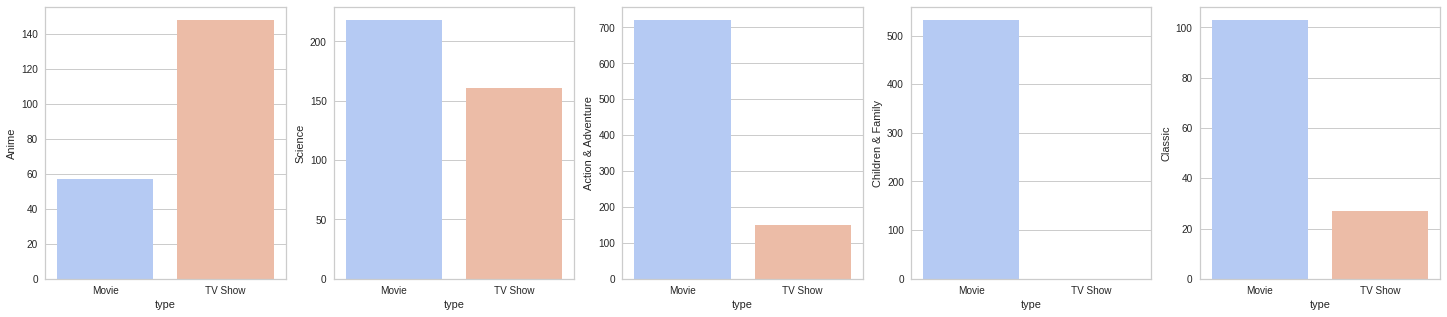

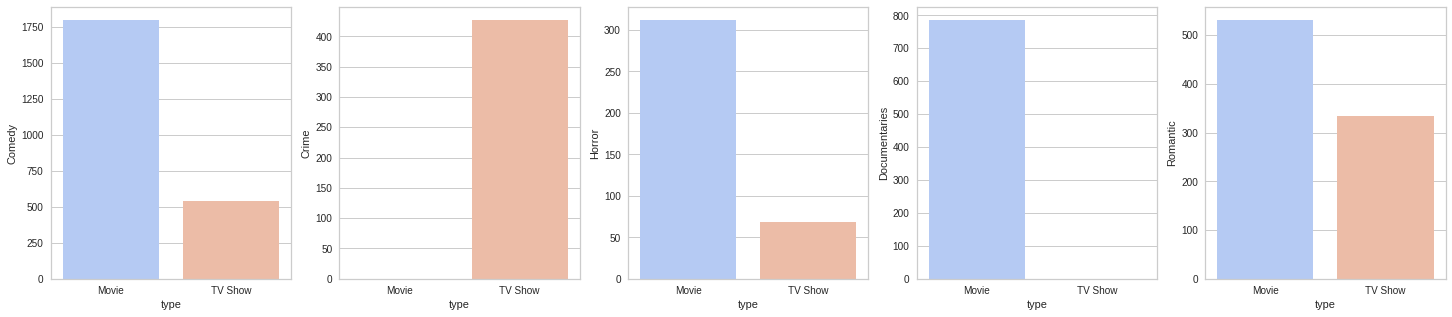

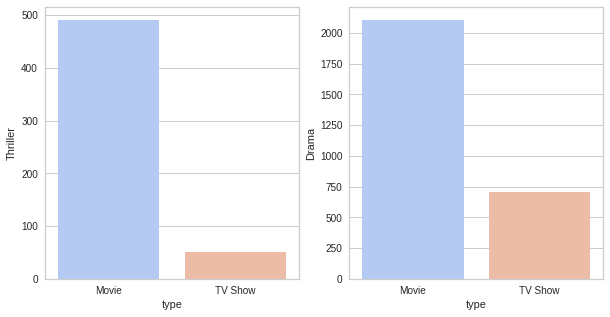

In [89]:
# visualization of the genre and respective content type count

fig, ax = plt.subplots(1,5, figsize=(25,5))
df1 =pd.DataFrame(netflix_data.groupby('type')['Anime'].sum()).reset_index()
sns.barplot(x='type',y= 'Anime',data=df1,ax=ax[0], palette='coolwarm')
df2 =pd.DataFrame(netflix_data.groupby('type')['Science'].sum()).reset_index()
sns.barplot(x='type',y= 'Science',data=df2,ax=ax[1], palette='coolwarm')
df3 =pd.DataFrame(netflix_data.groupby('type')['Action & Adventure'].sum()).reset_index()
sns.barplot(x='type',y= 'Action & Adventure',data=df3,ax=ax[2], palette='coolwarm')
df4 =pd.DataFrame(netflix_data.groupby('type')['Children & Family'].sum()).reset_index()
sns.barplot(x='type',y= 'Children & Family',data=df4,ax=ax[3], palette='coolwarm')
df5 =pd.DataFrame(netflix_data.groupby('type')['Classic'].sum()).reset_index()
sns.barplot(x='type',y= 'Classic',data=df5,ax=ax[4], palette='coolwarm')

fig, axs = plt.subplots(1,5, figsize=(25,5))
df6 =pd.DataFrame(netflix_data.groupby('type')['Comedy'].sum()).reset_index()
sns.barplot(x='type',y= 'Comedy',data=df6,ax=axs[0], palette='coolwarm')
df7 =pd.DataFrame(netflix_data.groupby('type')['Crime'].sum()).reset_index()
sns.barplot(x='type',y= 'Crime',data=df7,ax=axs[1], palette='coolwarm')
df8 =pd.DataFrame(netflix_data.groupby('type')['Horror'].sum()).reset_index()
sns.barplot(x='type',y= 'Horror',data=df8,ax=axs[2], palette='coolwarm')
df9 =pd.DataFrame(netflix_data.groupby('type')['Documentaries'].sum()).reset_index()
sns.barplot(x='type',y= 'Documentaries',data=df9,ax=axs[3], palette='coolwarm')
df10 =pd.DataFrame(netflix_data.groupby('type')['Romantic'].sum()).reset_index()
sns.barplot(x='type',y= 'Romantic',data=df10,ax=axs[4], palette='coolwarm')

fig, axs = plt.subplots(1,2, figsize=(10,5))
df11 =pd.DataFrame(netflix_data.groupby('type')['Thriller'].sum()).reset_index()
sns.barplot(x='type',y= 'Thriller',data=df11,ax=axs[0], palette='coolwarm')
df12 =pd.DataFrame(netflix_data.groupby('type')['Drama'].sum()).reset_index()
sns.barplot(x='type',y= 'Drama',data=df12,ax=axs[1], palette='coolwarm')

Bar plot to check the shows or movies count for different ratings.

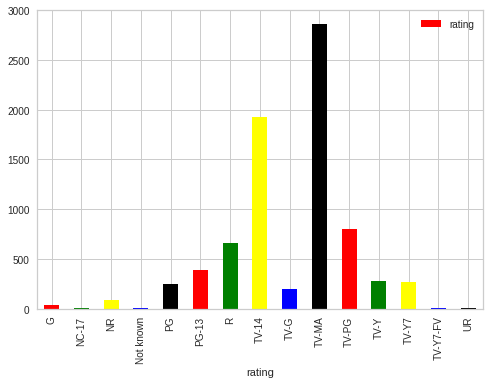

In [91]:
#Visualization of content rating

netflix_data.groupby('rating')['rating'].count().plot(kind='bar',legend=True, color = ['red', 'green', 'yellow', 'blue', 'black'])

In [26]:
# creating separate column for checking if content is season wise or not

netflix_data['Season_wise_content'] = netflix_data['duration'].apply(lambda x: 'yes' if 'Season' in x else 'no')

In [27]:
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,Action & Adventure,Anime,Children & Family,Classic,Comedy,Crime,Documentaries,Horror,Romantic,Science,Thriller,Drama,Season_wise_content
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,0,0,0,0,0,0,0,0,0,1,0,1,yes
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,0,0,0,0,0,0,0,0,0,0,0,1,no
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,0,0,0,0,0,0,0,1,0,0,0,0,no
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0,0,0,0,0,0,0,0,1,0,0,no
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,0,0,0,0,0,0,0,0,0,0,0,1,no


In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# function to get country names for different content type

def column_values(netflix_data):
  netflix_data['country'].value_counts().index.values
  all_countries = ""
  for i in netflix_data['country'].value_counts().index.values:
    all_countries  = all_countries + "," + i
  all_countries = all_countries.split(',')
  countries = [s.strip() for s in all_countries]
  countries = np.unique(countries)
  countries = list(countries)

  countries.pop(0)
  return countries


In [29]:
# calling function for data which contains only movies related records
# Unique country list for content type as Movies will be returned

movie_countries = column_values(netflix_data[netflix_data['type']== "Movie"])
print("Total no of countries in dataset for content type as movies: ",len(movie_countries))
print("unique country list for Movie content type : \n ")
print(movie_countries)

Total no of countries in dataset for content type as movies:  111
unique country list for Movie content type : 
 
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bangladesh', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Not known', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Po

In [30]:
# calling function for data which contains only Tv show related records
# Unique country list for content type as Tv Show will be returned

tv_show_countries = column_values(netflix_data[netflix_data['type']== "TV Show"])
print("Total no of countries in dataset for content type as Tv shows:\n \n ",len(tv_show_countries))
print("unique country list for Movie content type : \n ")
print(tv_show_countries)

Total no of countries in dataset for content type as Tv shows:
 
  66
unique country list for Movie content type : 
 
['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait', 'Lebanon', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Not known', 'Pakistan', 'Philippines', 'Poland', 'Puerto Rico', 'Russia', 'Saudi Arabia', 'Senegal', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'West Germany']


In [31]:
# printing the common countries having both content type

print("Common countries for Tv shows and movie content both:")
print(len(list(set(movie_countries).intersection(tv_show_countries))),'countries \n \n',list(set(movie_countries).intersection(tv_show_countries)))

Common countries for Tv shows and movie content both:
59 countries 
 
 ['Hong Kong', 'Taiwan', 'Denmark', 'India', 'Spain', 'Switzerland', 'Netherlands', 'Mexico', 'South Korea', 'Poland', 'Israel', 'Italy', 'Argentina', 'Iceland', 'Malta', 'Ireland', 'Russia', 'Ukraine', 'Australia', 'Indonesia', 'Austria', 'Croatia', 'Kuwait', 'Greece', 'United States', 'Germany', 'Pakistan', 'Malaysia', 'Colombia', 'Chile', 'Hungary', 'China', 'Uruguay', 'West Germany', 'Finland', 'France', 'Thailand', 'Saudi Arabia', 'Turkey', 'Japan', 'Philippines', 'New Zealand', 'Brazil', 'Singapore', 'Lebanon', 'Norway', 'South Africa', 'United Kingdom', 'Nigeria', 'Czech Republic', 'Egypt', 'Sweden', 'Not known', 'Canada', 'Senegal', 'Jordan', 'Belgium', 'United Arab Emirates', 'Luxembourg']


In [32]:
# printing countries which contains only movie related content

onlymovie_countries = [x for x in movie_countries if x not in tv_show_countries]
print("No of countries with only movie type content ",len(onlymovie_countries))
print("List of countries with movie type content only \n",onlymovie_countries)

No of countries with only movie type content  52
List of countries with movie type content only 
 ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Bahamas', 'Bangladesh', 'Bermuda', 'Botswana', 'Bulgaria', 'Cambodia', 'Cayman Islands', 'Dominican Republic', 'East Germany', 'Ecuador', 'Georgia', 'Ghana', 'Guatemala', 'Iran', 'Iraq', 'Jamaica', 'Kazakhstan', 'Kenya', 'Latvia', 'Liechtenstein', 'Lithuania', 'Malawi', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Portugal', 'Qatar', 'Romania', 'Samoa', 'Serbia', 'Slovakia', 'Slovenia', 'Somalia', 'Soviet Union', 'Sri Lanka', 'Sudan', 'Uganda', 'Vatican City', 'Venezuela', 'Vietnam', 'Zimbabwe']


In [33]:
# printing countries which contains only Tv show related content

onlytvshow_countries = [x for x in tv_show_countries if x not in movie_countries]
print("No of countries with only Tv show type content",len(onlytvshow_countries))
print("List of countries with TV show type content only \n",onlytvshow_countries)

No of countries with only Tv show type content 7
List of countries with TV show type content only 
 ['Azerbaijan', 'Belarus', 'Cuba', 'Cyprus', 'Mauritius', 'Puerto Rico', 'Syria']


Bar plot to check the content type across some of the countries

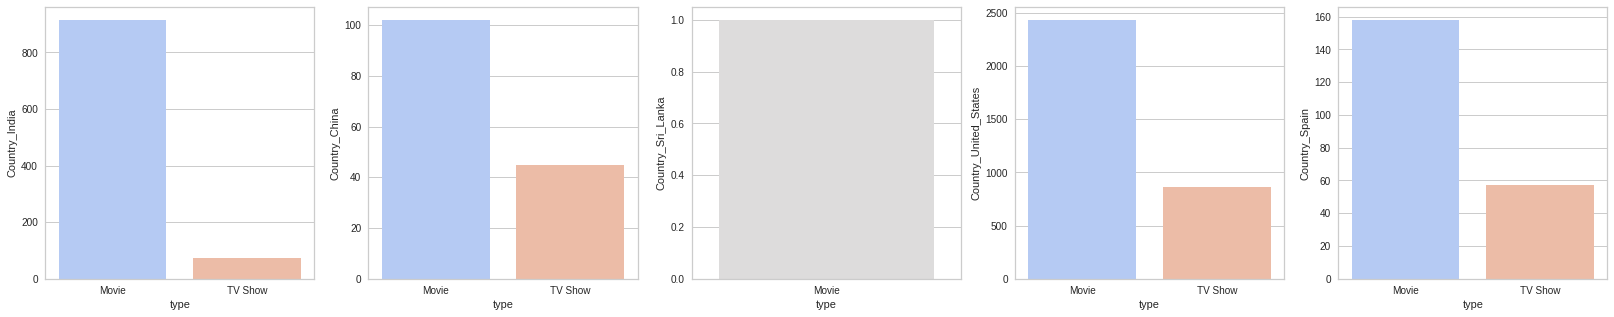

In [92]:
# visualizing content type country wise

fig, ax = plt.subplots(1,5, figsize=(28,5))
indian_content = netflix_data[netflix_data['country'].str.contains('India')]
indian_content =pd.DataFrame(indian_content.groupby('type')['country'].count()).reset_index()
indian_content.rename(columns ={'country':'Country_India'},inplace =True)
sns.barplot(x='type',y= 'Country_India',data=indian_content,ax=ax[0], palette='coolwarm')

China_content = netflix_data[netflix_data['country'].str.contains('China')]
China_content =pd.DataFrame(China_content.groupby('type')['country'].count()).reset_index()
China_content.rename(columns ={'country':'Country_China'},inplace =True)
sns.barplot(x='type',y= 'Country_China',data=China_content,ax=ax[1], palette='coolwarm')

SriLanka_content = netflix_data[netflix_data['country'].str.contains('Sri Lanka')]
SriLanka_content =pd.DataFrame(SriLanka_content.groupby('type')['country'].count()).reset_index()
SriLanka_content.rename(columns ={'country':'Country_Sri_Lanka'},inplace =True)
sns.barplot(x='type',y= 'Country_Sri_Lanka',data=SriLanka_content,ax=ax[2], palette='coolwarm')

United_States_content = netflix_data[netflix_data['country'].str.contains('United States')]
United_States_content =pd.DataFrame(United_States_content.groupby('type')['country'].count()).reset_index()
United_States_content.rename(columns ={'country':'Country_United_States'},inplace =True)
sns.barplot(x='type',y= 'Country_United_States',data=United_States_content,ax=ax[3], palette='coolwarm')

Spain_content = netflix_data[netflix_data['country'].str.contains('Spain')]
Spain_content =pd.DataFrame(Spain_content.groupby('type')['country'].count()).reset_index()
Spain_content.rename(columns ={'country':'Country_Spain'},inplace =True)
sns.barplot(x='type',y= 'Country_Spain',data=Spain_content,ax=ax[4], palette='coolwarm')



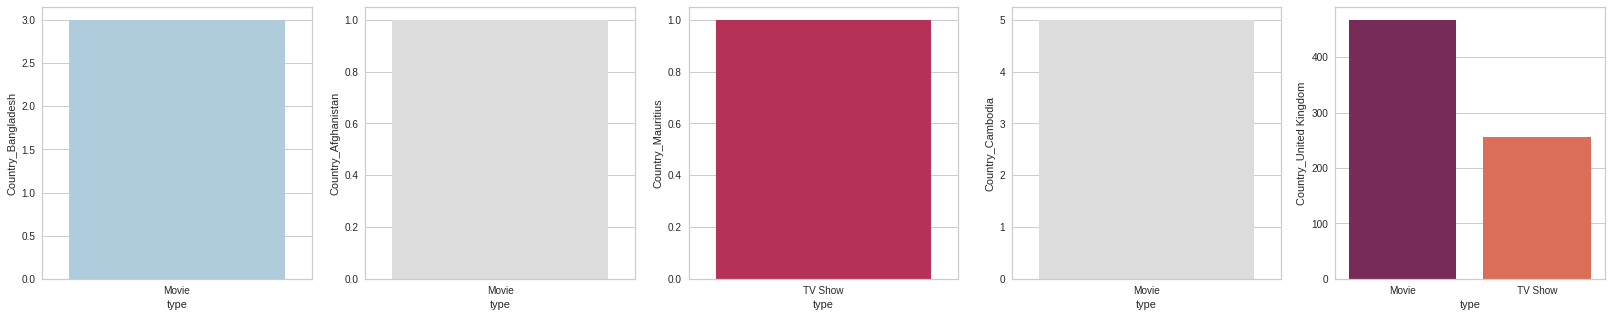

In [94]:
# visualizing content type country wise

fig, ax = plt.subplots(1,5, figsize=(28,5))
indian_content = netflix_data[netflix_data['country'].str.contains('Bangladesh')]
indian_content =pd.DataFrame(indian_content.groupby('type')['country'].count()).reset_index()
indian_content.rename(columns ={'country':'Country_Bangladesh'},inplace =True)
sns.barplot(x='type',y= 'Country_Bangladesh',data=indian_content,ax=ax[0], palette='Paired')

China_content = netflix_data[netflix_data['country'].str.contains('Afghanistan')]
China_content =pd.DataFrame(China_content.groupby('type')['country'].count()).reset_index()
China_content.rename(columns ={'country':'Country_Afghanistan'},inplace =True)
sns.barplot(x='type',y= 'Country_Afghanistan',data=China_content,ax=ax[1], palette='coolwarm')

SriLanka_content = netflix_data[netflix_data['country'].str.contains('Mauritius')]
SriLanka_content =pd.DataFrame(SriLanka_content.groupby('type')['country'].count()).reset_index()
SriLanka_content.rename(columns ={'country':'Country_Mauritius'},inplace =True)
sns.barplot(x='type',y= 'Country_Mauritius',data=SriLanka_content,ax=ax[2], palette='rocket')

United_States_content = netflix_data[netflix_data['country'].str.contains('Cambodia')]
United_States_content =pd.DataFrame(United_States_content.groupby('type')['country'].count()).reset_index()
United_States_content.rename(columns ={'country':'Country_Cambodia'},inplace =True)
sns.barplot(x='type',y= 'Country_Cambodia',data=United_States_content,ax=ax[3], palette='coolwarm')

Spain_content = netflix_data[netflix_data['country'].str.contains('United Kingdom')]
Spain_content =pd.DataFrame(Spain_content.groupby('type')['country'].count()).reset_index()
Spain_content.rename(columns ={'country':'Country_United Kingdom'},inplace =True)
sns.barplot(x='type',y= 'Country_United Kingdom',data=Spain_content,ax=ax[4], palette='rocket')

In [36]:
# content type vs year when data was added to netflix

new_df = pd.DataFrame(netflix_data.groupby(['date_added_year','type'])['type'].count())
new_df.rename(columns={'date_added_year':'count of movies and tv shows','type':'content_type_count'},inplace=True)
new_df.reset_index()

,date_added_year,type,content_type_count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,6


scatter plot to check the content type for different years when the data was added to netflix

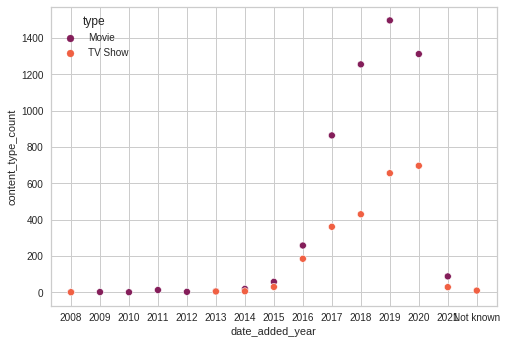

In [95]:
# Scatter plot to visualize type of content  added per year 

sns.scatterplot(x='date_added_year', y='content_type_count', data=new_df, hue='type', palette='rocket')

In scatter plot , it is observed since 2010, number of TV Shows are increasing

**Most popular Genres for Different Countries**

In [97]:
# function defined to find the most popular genres for some of the countries

def genre_country(country_name):
  df = netflix[netflix['country'].str.contains(country_name)]
  l1={}
  for ele in df['listed_in']:
    for el in ele.split(','):
      if el in l1.keys():
        l1[el]= l1[el] + 1
      else:
        l1[el] = 1
  l1 = dict(Counter(l1).most_common(5))
  plt.bar(range(len(l1)), list(l1.values()), align='center', color=['yellow', 'red', 'green', 'blue', 'cyan', 'pink'])
  plt.xticks(range(len(l1)), list(l1.keys()),rotation = 'vertical')
  plt.title("Most popular Genres for "+country_name)
  plt.show()       



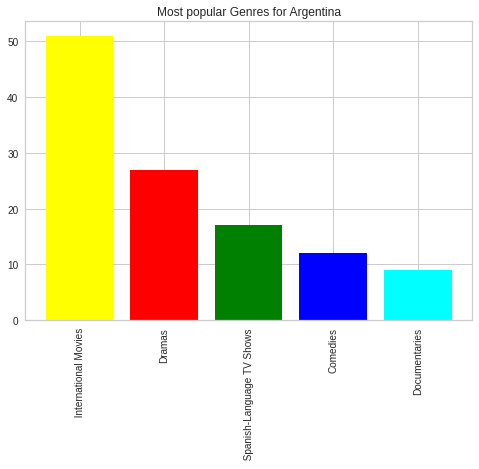

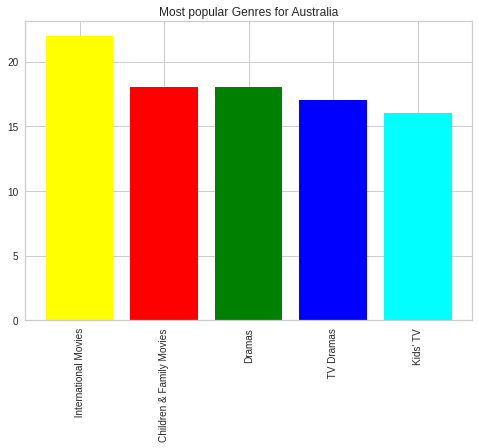

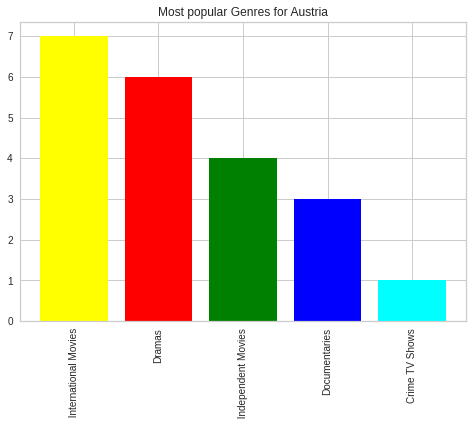

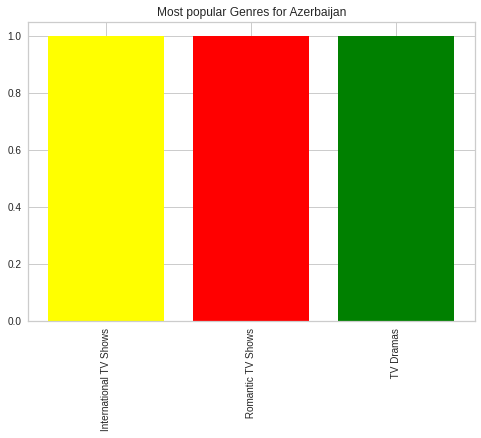

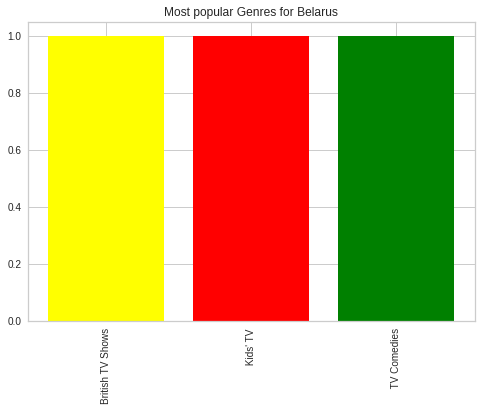

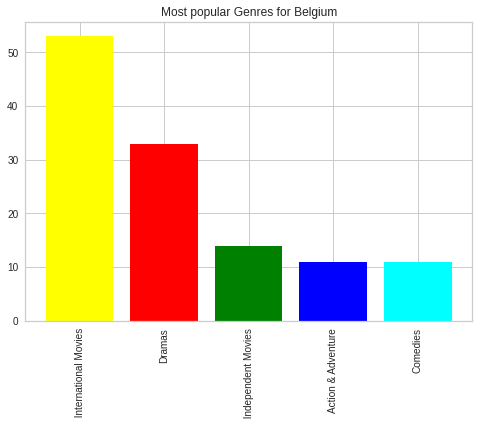

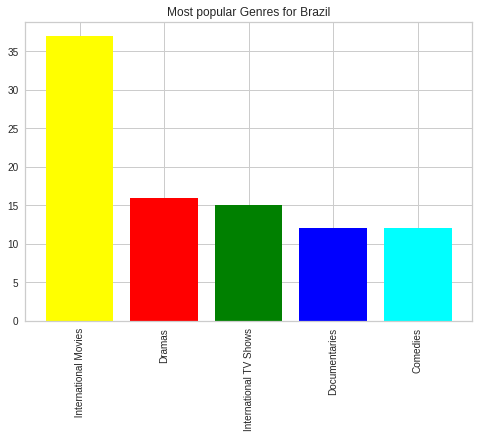

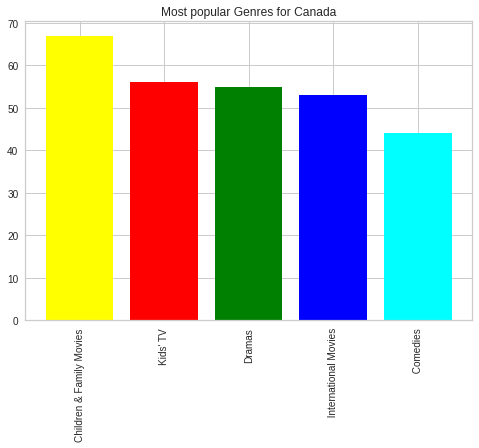

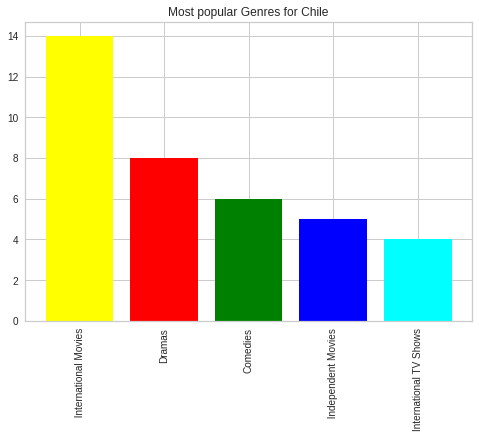

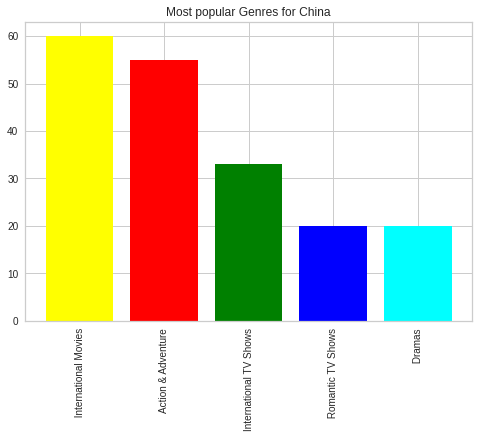

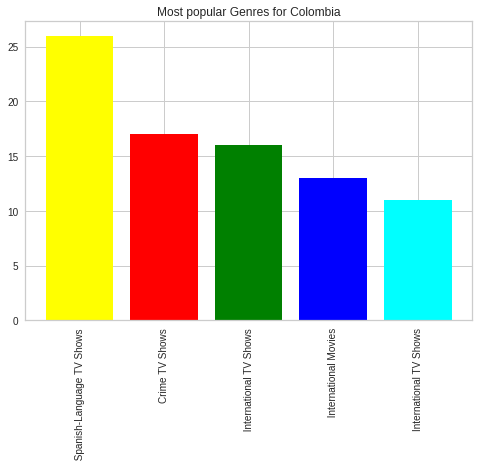

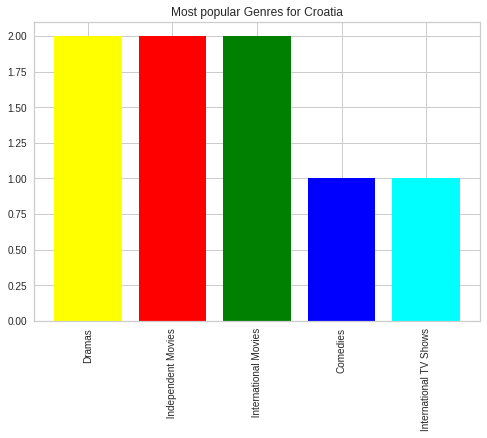

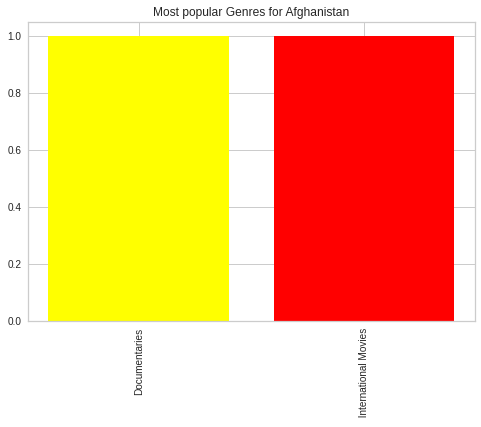

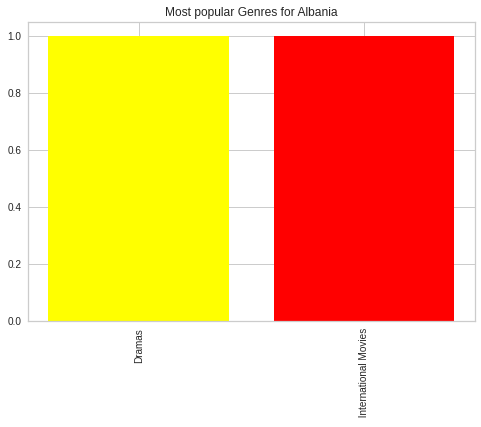

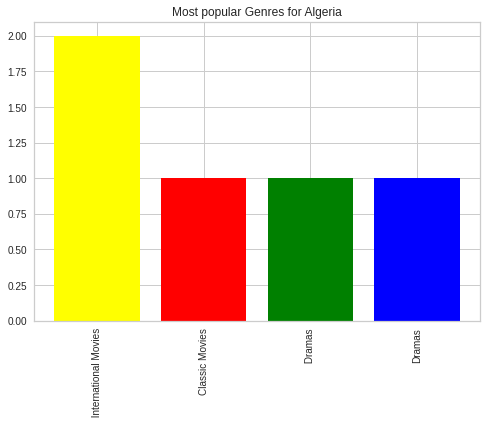

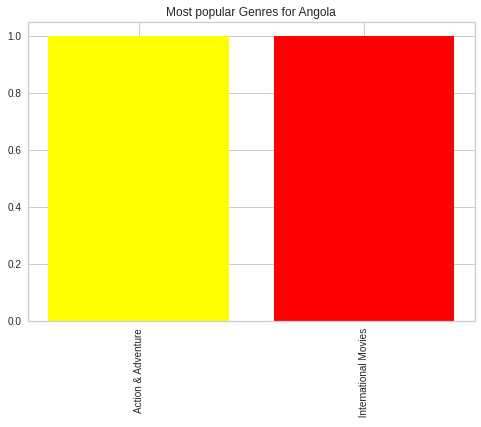

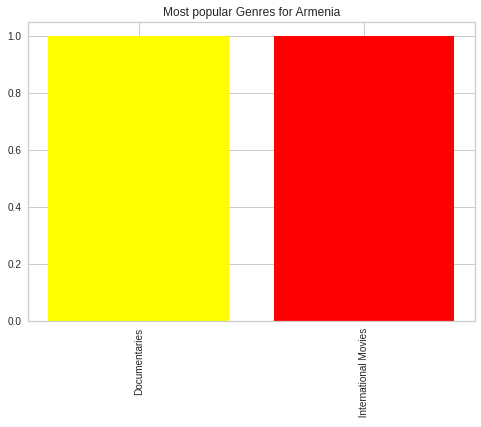

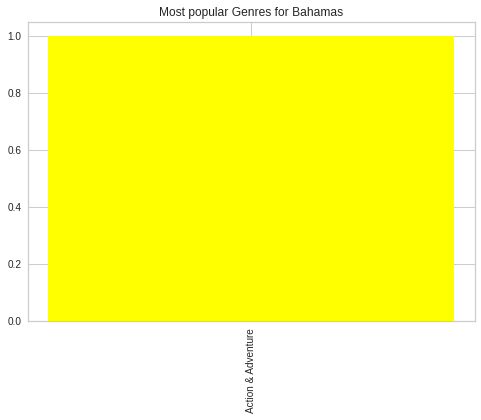

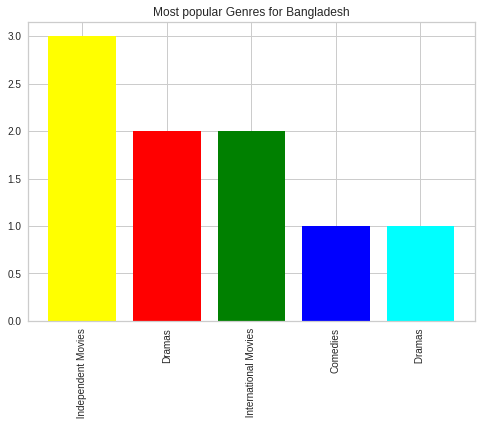

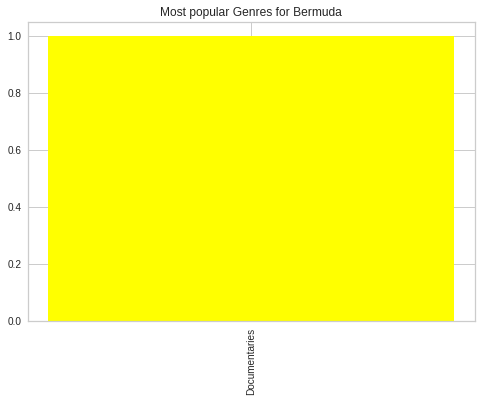

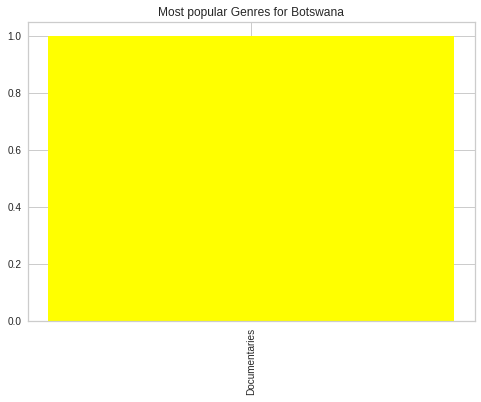

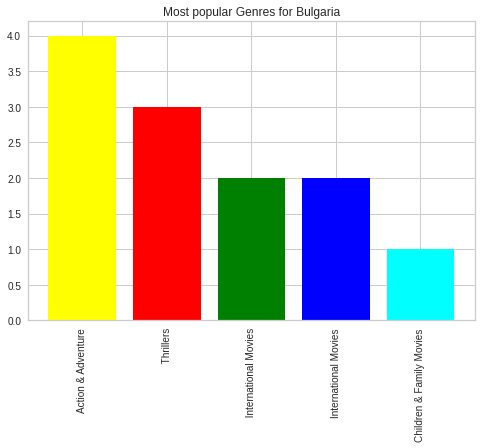

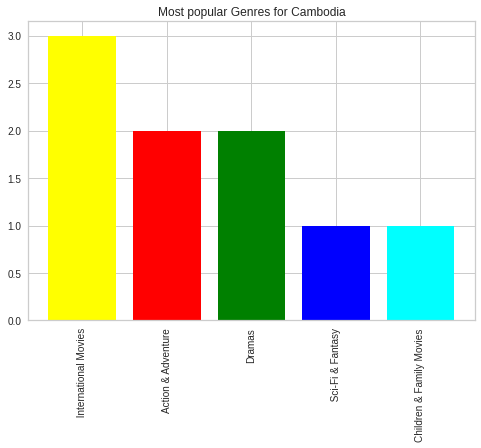

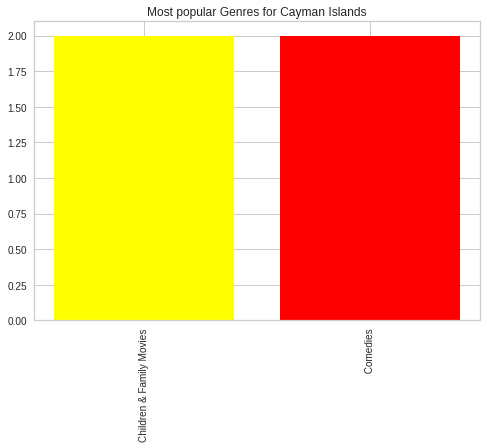

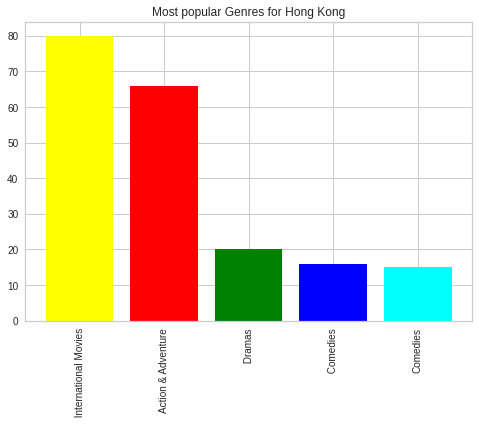

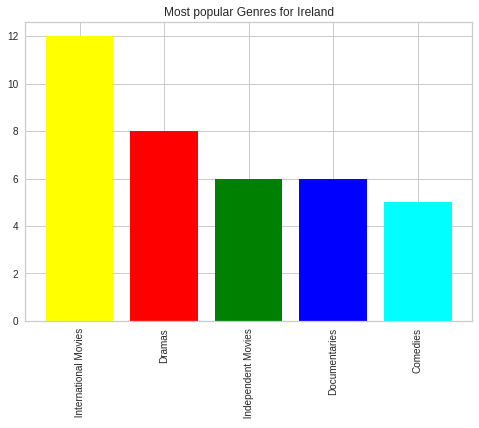

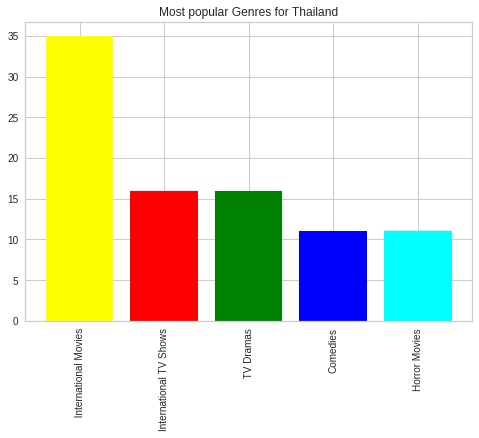

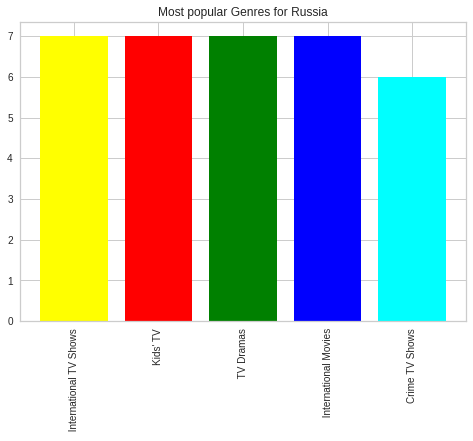

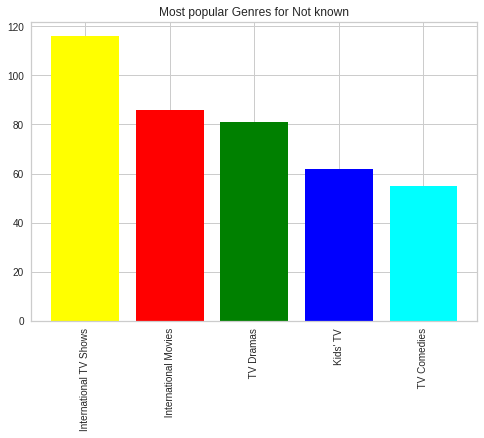

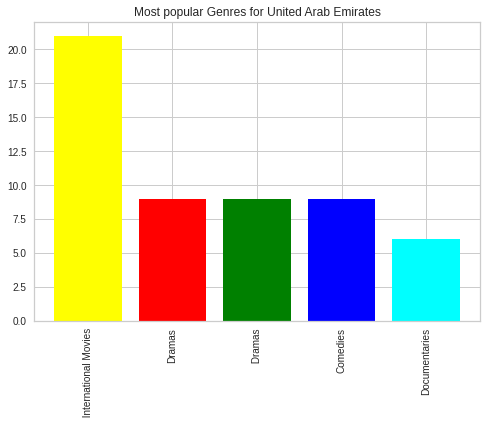

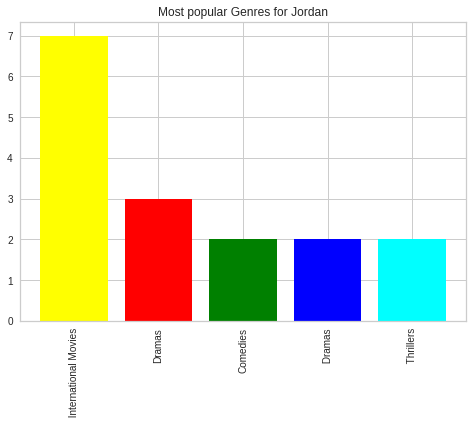

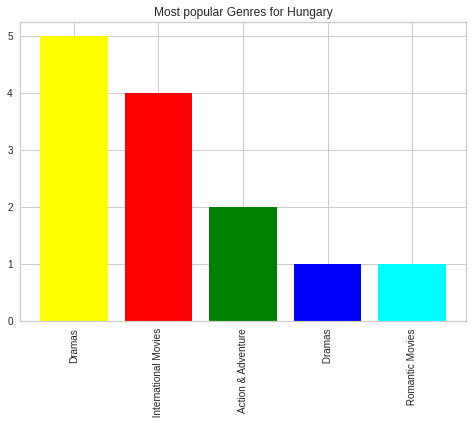

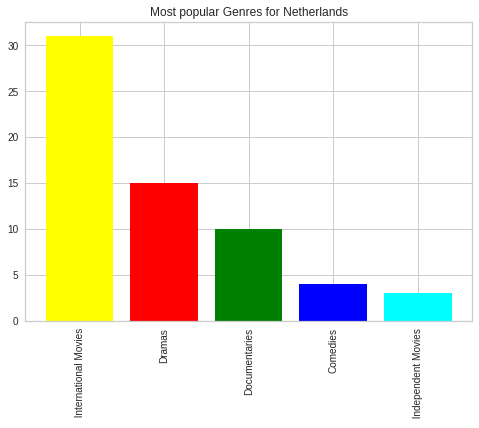

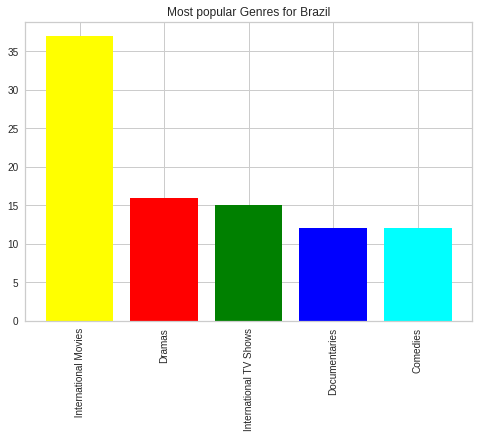

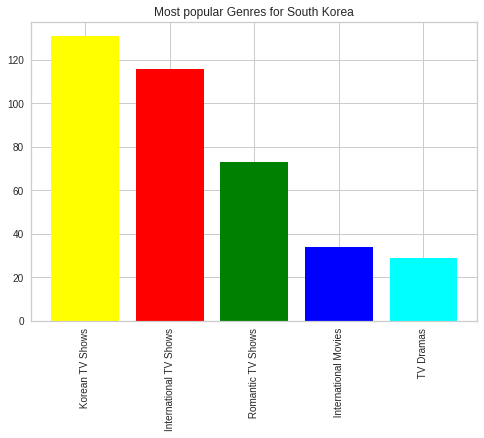

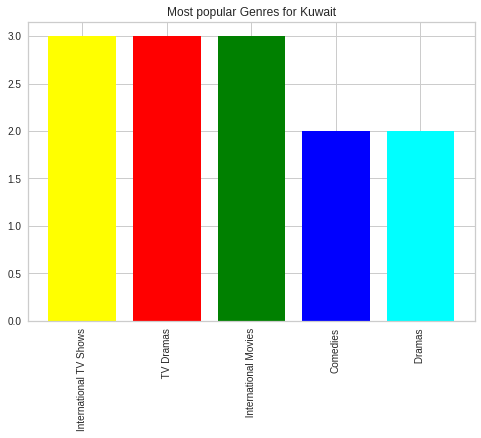

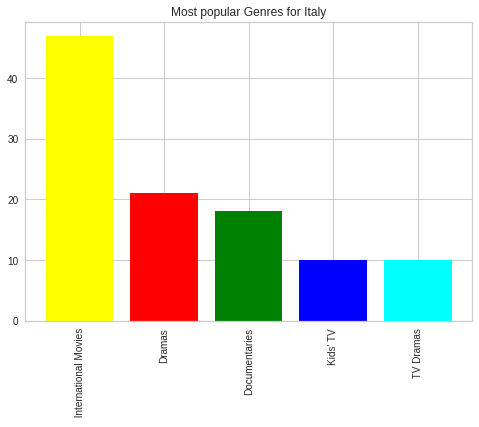

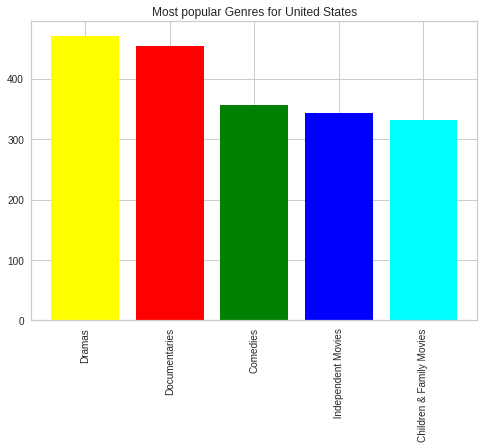

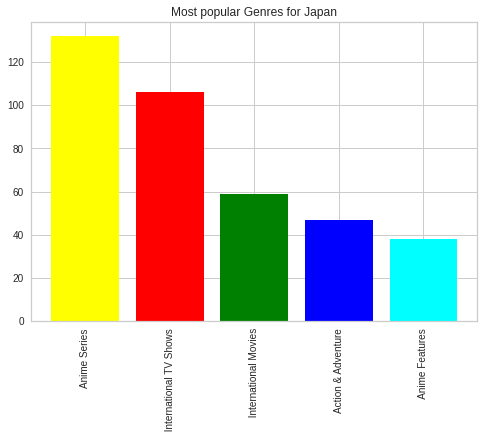

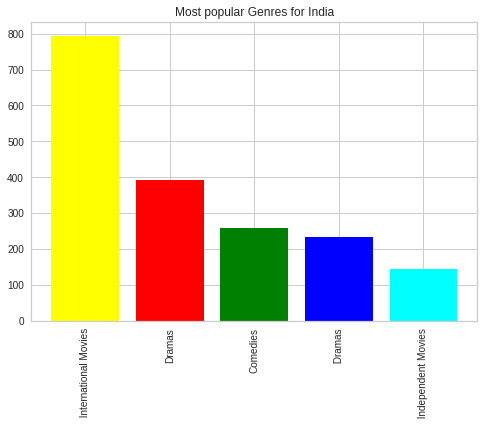

In [99]:
# plotting most popular genres for some of the countries

from collections import Counter
countries = ['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 
             'Colombia', 'Croatia','Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Bahamas', 'Bangladesh', 'Bermuda', 
             'Botswana', 'Bulgaria', 'Cambodia', 'Cayman Islands','Hong Kong', 'Ireland', 'Thailand', 'Russia', 'Not known', 
             'United Arab Emirates', 'Jordan', 'Hungary', 'Netherlands', 'Brazil', 'South Korea', 'Kuwait', 'Italy', 'United States', 'Japan', 'India']
for country in countries:
  genre_country(country)
 

**Text based clustering**

In [40]:
# checking dataset
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [41]:
# checking data shape
netflix.shape

(7787, 12)

In [42]:
# checking columns
netflix.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_year'],
      dtype='object')

In [43]:
# checking for duplicates
netflix.duplicated().sum()

0

In [44]:
# combining textual columns

netflix['combined_text'] = netflix['description']+netflix['listed_in']+netflix['rating']+netflix['director']+netflix['cast']+netflix['country']

In [45]:
# function to change data to lowercase and perform pattern change
def textpattern(text):
  return re.sub(r"[^a-zA-Z ]","",str(text)).lower()

In [46]:
# converting to lower case and basic pattern change to clean data

netflix['combined_text'] = netflix['combined_text'].apply(textpattern)

In [47]:
# stop words

stemmer = SnowballStemmer('english')
stopwords = set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [48]:
# function to perform stemming of the words and remove stop words

def filter(text, stopwords):
    cleaned = []
    tokens = word_tokenize(text) 
    for word in tokens:
        if word not in stopwords:
            cleaned.append(stemmer.stem(word))
    return " ".join(cleaned)
cleaned_text = []
for row in netflix.iterrows():
    cleaned_text.append(filter(row[1]['combined_text'],stopwords))
  
cleaned_text[0]

'futur elit inhabit island paradis far crowd slum get one chanc join save squalorintern tv show tv drama tv scifi fantasytvmanot knownjoo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschibrazil'

In [49]:
# cleaned data
filtered_text = pd.Series(cleaned_text)

In [50]:
#using tfidf transforming data

tfidf = TfidfVectorizer(max_df = 0.9,min_df = 1,max_features=12000)
x= tfidf.fit_transform(filtered_text)

In [51]:
x

<7787x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 196581 stored elements in Compressed Sparse Row format>

In [52]:
# using PCA to project data to lower dimensional space

pca = PCA(random_state=42)
pca.fit(x.toarray())

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

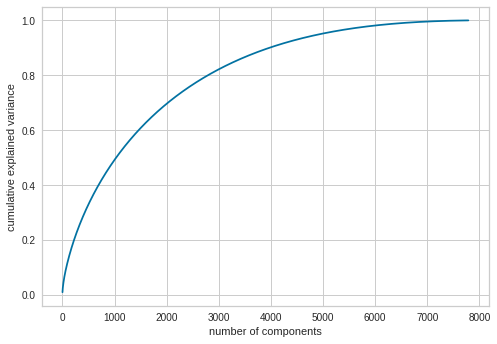

In [53]:
# Explained variance for different number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [54]:
# applying PCA to transform the data into 4000 components selected by checking the above graph . explained variance for 4000 components is around 0.9

pca = PCA(n_components=4000,random_state=42)
pca.fit(x.toarray())
transformed_data = pca.fit_transform(x.toarray())
transformed_data.shape

(7787, 4000)

In [55]:
#data transformed 

transformed_data

array([[ 0.15468516, -0.02488991, -0.02777466, ...,  0.00834011,
        -0.02029719,  0.00711445],
       [-0.0462605 , -0.01411272,  0.01832896, ..., -0.00463972,
         0.00451862, -0.01327952],
       [-0.04561061, -0.05109733, -0.00512856, ...,  0.0029371 ,
         0.0090817 ,  0.00901519],
       ...,
       [-0.06251149,  0.02440727,  0.09411755, ..., -0.00648251,
        -0.00172617,  0.00220766],
       [ 0.07385033,  0.04009598,  0.01558967, ..., -0.00393363,
         0.0070646 , -0.00440798],
       [-0.0726121 ,  0.2408872 ,  0.04894853, ..., -0.00117246,
         0.00047241, -0.00227913]])

Clustering Algorithms

K Means Clustering

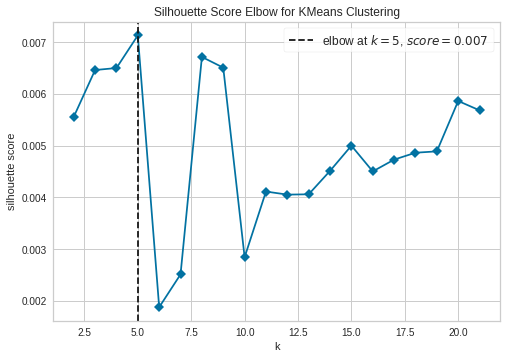

In [56]:
# finding optimal number of clusters for K Means

# Instantiate the clustering model and visualizer
model = KMeans(tol=1e-4,random_state = 42)
visualizer = KElbowVisualizer(model, k=(2,22), metric='silhouette', timings=False)

visualizer.fit(transformed_data)
visualizer.show()  

In [57]:
# fitting kmeans to transformed data

kmeans= KMeans(n_clusters=5,max_iter=1000,tol=1e-4, n_init=1,random_state= 42)
kmeans.fit(transformed_data)

KMeans(max_iter=1000, n_clusters=5, n_init=1, random_state=42)

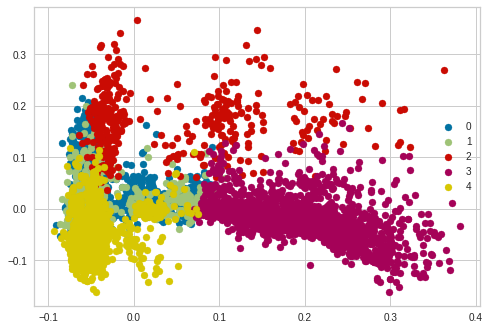

In [58]:
# plotting clusters

label = kmeans.fit_predict(transformed_data)
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(transformed_data[label == i , 0] , transformed_data[label == i , 1] , label = i)
plt.legend()
plt.show()


In [59]:
# created new column with cluster number

netflix['cluster'] = kmeans.labels_

In [60]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,combined_text,cluster
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,in a future where the elite inhabit an island ...,3
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,after a devastating earthquake hits mexico cit...,4
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,when an army recruit is found dead his fellow ...,4
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,in a postapocalyptic world ragdoll robots hide...,1
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,a brilliant group of students become cardcount...,0


In [61]:
# value count for different clusters

netflix.cluster.value_counts()

0    2551
4    2425
3    1322
1    1117
2     372
Name: cluster, dtype: int64

Text(0, 0.5, 'size')

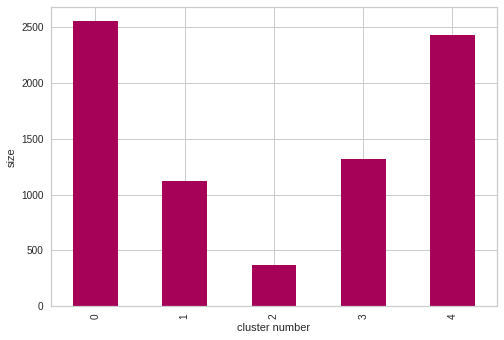

In [62]:
# Size of clusters formed

netflix.cluster.value_counts().sort_index().plot(kind='bar', color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

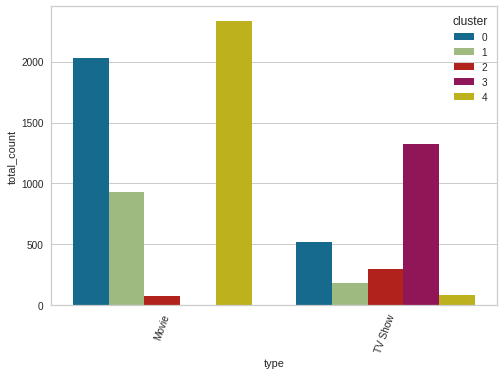

In [63]:
# plotting content type count for diferent clusters

def cluster_analysis(df,col_name):
  df1 = df.groupby(['cluster',col_name]).agg(total_count=(col_name,'count'))
  df1 = df1.reset_index()
  sns.barplot(x=col_name,y="total_count", hue="cluster",data=df1)
  plt.xticks(rotation=70)
 
cluster_analysis(netflix,'type')

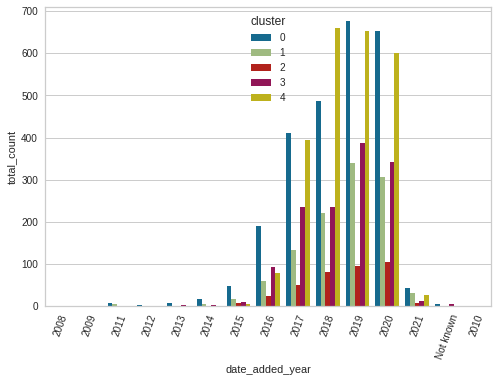

In [64]:

# plotting bar plot for analyzing the the year when content was added to netflix for different clusters

cluster_analysis(netflix,'date_added_year')

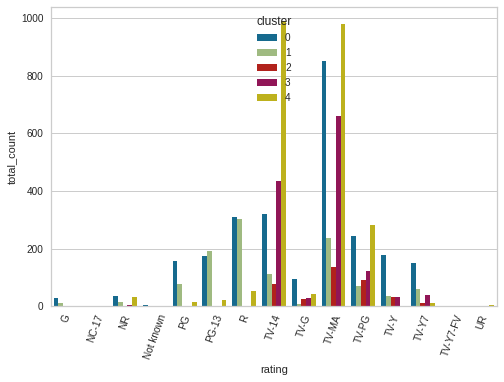

In [65]:
# rating wise cluster analysis

cluster_analysis(netflix,'rating')

Genres for different clusters using world cloud

In [66]:
# function to create world cloud based on genres for different clusters'

def world_cloud(cluster):
  plt.subplots(figsize=(20,10))
  netflix_cluster = netflix[netflix['cluster'] == cluster]
  wordcloud = WordCloud(background_color='black', width=2000,height=1100).generate(" ".join(netflix_cluster[netflix_cluster['listed_in']!='Not known'].listed_in))                    
  plt.imshow(wordcloud)
  plt.title("Cluster "+str(cluster+1))
  plt.axis('off')
  plt.show()

###**CLUSTER 1**

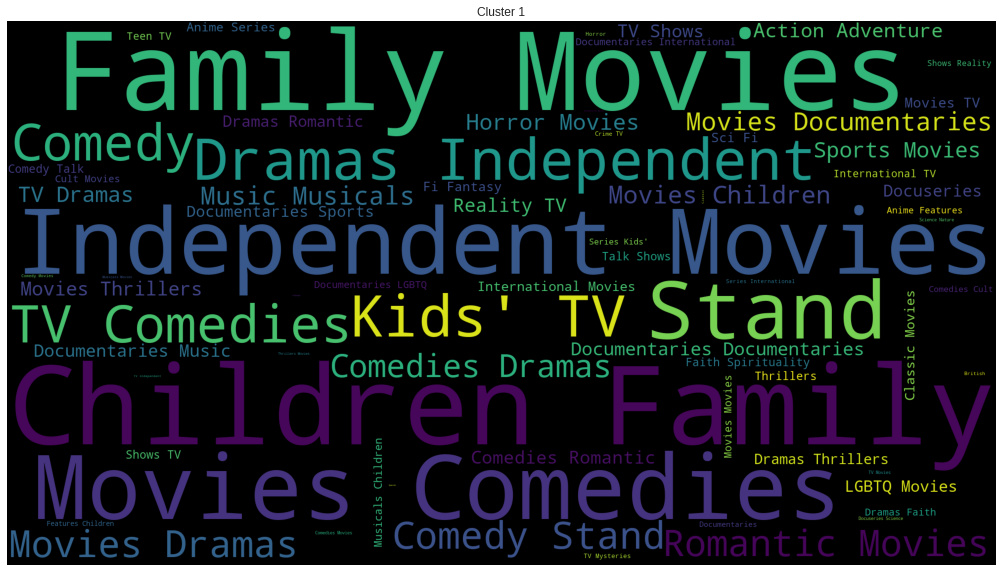

In [67]:
world_cloud(0)

###**CLUSTER 2**

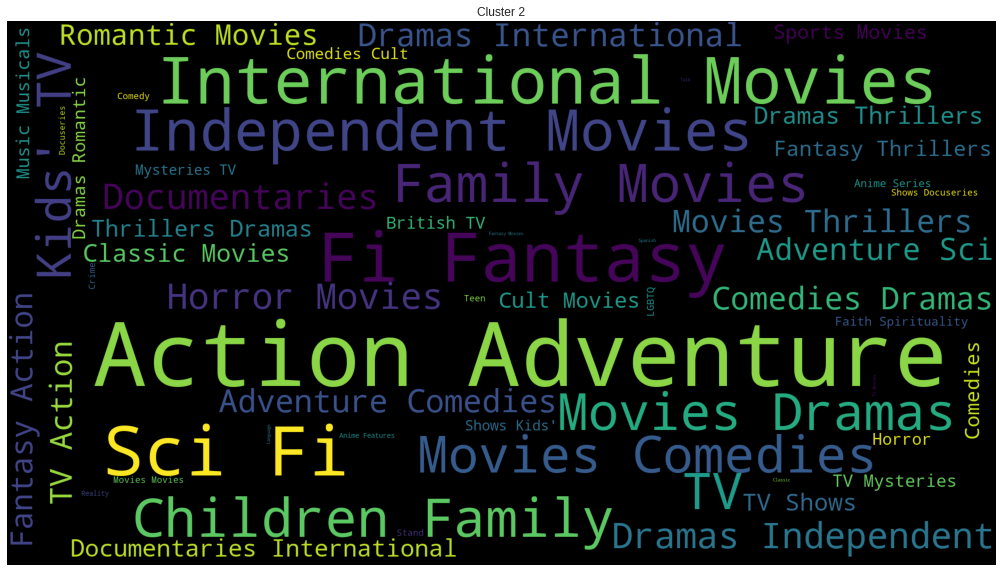

In [68]:
world_cloud(1)

###**CLUSTER 3**

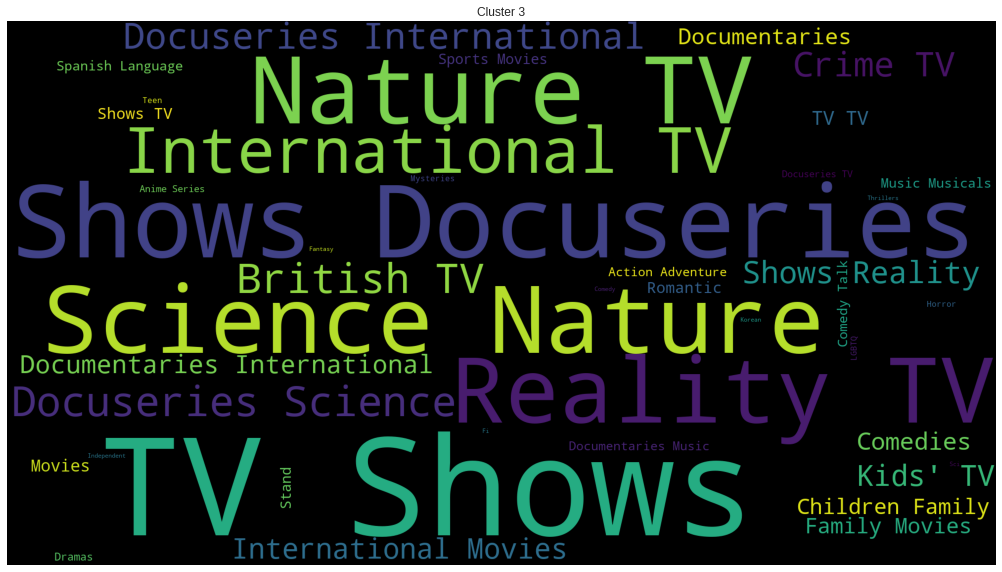

In [69]:
world_cloud(2)

###**CLUSTER 4**

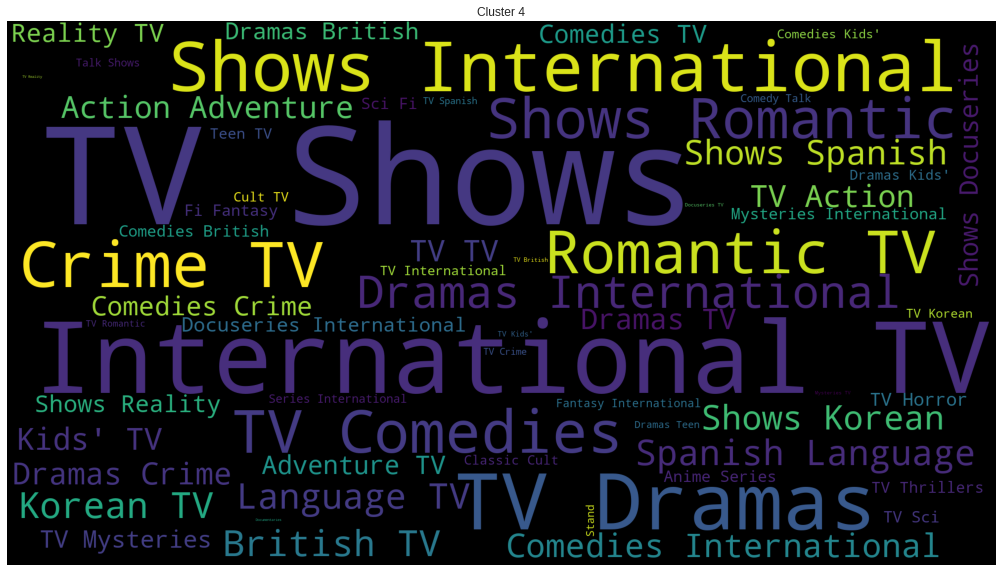

In [70]:
world_cloud(3)

###**CLUSTER 5**

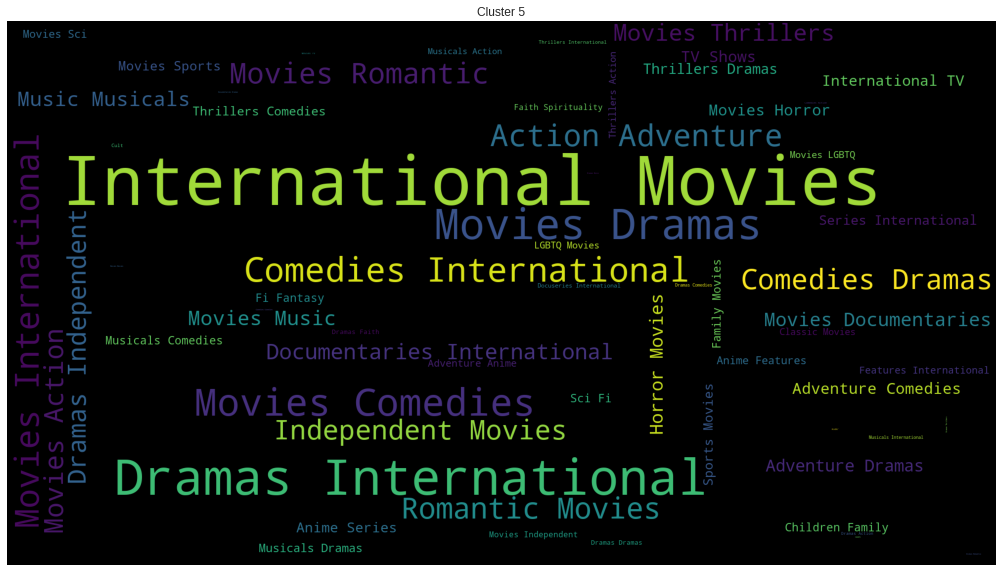

In [71]:
world_cloud(4)

###**Content Based Recommender system using Cosine Similarity**

In [72]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,combined_text,cluster
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,in a future where the elite inhabit an island ...,3
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,after a devastating earthquake hits mexico cit...,4
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,when an army recruit is found dead his fellow ...,4
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,in a postapocalyptic world ragdoll robots hide...,1
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,a brilliant group of students become cardcount...,0


In [73]:
# picking some important columns to be used for content based recommendation system

df = pd.DataFrame()
from ast import literal_eval
cols = ['title','cast','director','rating','listed_in']
for col in cols:
  df[col] = netflix[col]

In [74]:
df.head()

,title,cast,director,rating,listed_in
0,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Not known,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Jorge Michel Grau,TV-MA,"Dramas, International Movies"
2,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Gilbert Chan,R,"Horror Movies, International Movies"
3,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",Shane Acker,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Robert Luketic,PG-13,Dramas


In [75]:
# Performing normal data cleaning, converting to lower case
for col in ['cast','director','rating','listed_in']:
  df[col] = df[col].apply(textpattern)


In [76]:
df.head()

,title,cast,director,rating,listed_in
0,3%,joo miguel bianca comparato michel gomes rodol...,not known,tvma,international tv shows tv dramas tv scifi fan...
1,7:19,demin bichir hctor bonilla oscar serrano azali...,jorge michel grau,tvma,dramas international movies
2,23:59,tedd chan stella chung henley hii lawrence koh...,gilbert chan,r,horror movies international movies
3,9,elijah wood john c reilly jennifer connelly ch...,shane acker,pg,action adventure independent movies scifi fa...
4,21,jim sturgess kevin spacey kate bosworth aaron ...,robert luketic,pg,dramas


In [77]:
#creating new column by combining required text columns

df['combined_text'] = df['cast']+df['director']+df['rating']+df['listed_in']

In [78]:
#function to clean text and remove stop words and perform stemmization

def filter(text, stopwords):
    cleaned = []
    tokens = word_tokenize(text) 
    for word in tokens:
        if word not in stopwords:
            cleaned.append(stemmer.stem(word))
    return " ".join(cleaned)
cleaned_text = []
for row in df.iterrows():
    cleaned_text.append(filter(row[1]['combined_text'],stopwords))

In [79]:
#Check cleaned text and created new column with the cleaned text

df['cleaned_text'] = cleaned_text

In [80]:
df.head()

,title,cast,director,rating,listed_in,combined_text,cleaned_text
0,3%,joo miguel bianca comparato michel gomes rodol...,not known,tvma,international tv shows tv dramas tv scifi fan...,joo miguel bianca comparato michel gomes rodol...,joo miguel bianca comparato michel gome rodolf...
1,7:19,demin bichir hctor bonilla oscar serrano azali...,jorge michel grau,tvma,dramas international movies,demin bichir hctor bonilla oscar serrano azali...,demin bichir hctor bonilla oscar serrano azali...
2,23:59,tedd chan stella chung henley hii lawrence koh...,gilbert chan,r,horror movies international movies,tedd chan stella chung henley hii lawrence koh...,tedd chan stella chung henley hii lawrenc koh ...
3,9,elijah wood john c reilly jennifer connelly ch...,shane acker,pg,action adventure independent movies scifi fa...,elijah wood john c reilly jennifer connelly ch...,elijah wood john c reilli jennif connelli chri...
4,21,jim sturgess kevin spacey kate bosworth aaron ...,robert luketic,pg,dramas,jim sturgess kevin spacey kate bosworth aaron ...,jim sturgess kevin spacey kate bosworth aaron ...


In [81]:
#picking required columns

col_list = ['title','cleaned_text']
df = df[col_list]

In [82]:
df.head()


,title,cleaned_text
0,3%,joo miguel bianca comparato michel gome rodolf...
1,7:19,demin bichir hctor bonilla oscar serrano azali...
2,23:59,tedd chan stella chung henley hii lawrenc koh ...
3,9,elijah wood john c reilli jennif connelli chri...
4,21,jim sturgess kevin spacey kate bosworth aaron ...


In [83]:
# applying count vectorizer and defining cosine similarity

vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(df['cleaned_text'])
cosine_similarity = cosine_similarity(count_matrix, count_matrix)

In [84]:
# setting title of movies/Tv shows as index

df.set_index('title',inplace=True)


In [85]:
df.head()

,cleaned_text
title,
3%,joo miguel bianca comparato michel gome rodolf...
7:19,demin bichir hctor bonilla oscar serrano azali...
23:59,tedd chan stella chung henley hii lawrenc koh ...
9,elijah wood john c reilli jennif connelli chri...
21,jim sturgess kevin spacey kate bosworth aaron ...


In [86]:
# function for finding top 10 similar movies or shows

indices = pd.Series(df.index)
def recommendations(title, cosine_sim = cosine_similarity):
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
        recommend_content.append(list(df.index)[i])
        
    return recommend_content

In [87]:
# getting top 10 recommendations for the provided movie name

recommendations('Zulu Man in Japan')

['Emicida: AmarElo - It’s All For Yesterday',
 'Joe Cocker: Mad Dog with Soul',
 'Tokyo Idols',
 'Highly Strung',
 'Avicii: True Stories',
 'Searching for Sugar Man',
 'This Was Tomorrow',
 'One Take',
 "BNK48: Girls Don't Cry",
 'Numero Zero. The Roots of Italian Rap']

###**Steps performed in this notebook in proper order**

Plotted different visualizations to analyze data

Used TF-IDF vectorizer and PCA to preprocess text data before providing to clustering algorithm

Performed K-Means Clustering to create clusters and used silhouette score and elbow curve to find optimal number of clusters

Created content based recommender system using count vectorizer and cosine similarity to find top 10 recommended similar movies or tv shows to the title of one movie provided